<a href="https://colab.research.google.com/github/AUJ12062001/DeepLearning/blob/main/202055202093_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!unzip /content/drive/MyDrive/dataset/archive.zip -d "/content/data"

Archive:  /content/drive/MyDrive/dataset/archive.zip
replace /content/data/pizza_not_pizza/food101_subset.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [44]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import tensorflow_hub as hub

In [45]:
data_directory = pathlib.Path('/content/data/pizza_not_pizza')
class_names = [item.name for item in data_directory.glob('*')][:2]
print(class_names)
['not_pizza', 'pizza']

['not_pizza', 'pizza']


['not_pizza', 'pizza']

In [46]:
pizza_dir = '/content/data/pizza_not_pizza/pizza' 
not_pizza_dir = '/content/data/pizza_not_pizza/not_pizza'
data_dir = '/content/data/pizza_not_pizza'

In [47]:
num_pizza_images = len(os.listdir(pizza_dir))
non_pizza_images = len(os.listdir(not_pizza_dir))
print(f'Number of Pizza images: {num_pizza_images}')
print(f'Number of Non-Pizza images: {non_pizza_images}')

Number of Pizza images: 983
Number of Non-Pizza images: 983


In [48]:
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data_dir, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [49]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [50]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 5))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()       
    plt.show()

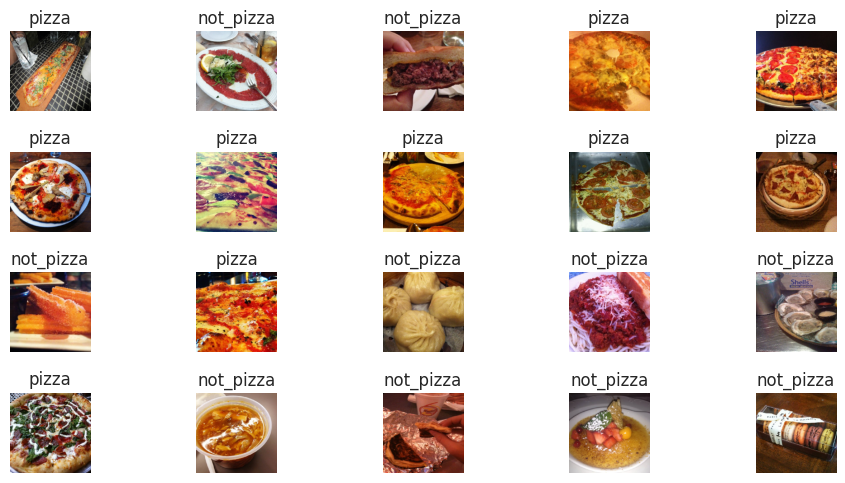

In [51]:
plot_random_images()

In [52]:
tf.random.set_seed(42)
model_1 = Sequential([
    Input(shape = (224, 224, 3)),    
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')   
])

model_1.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs= 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
50/50 [==============================] - 12s 193ms/step - loss: 2.5649 - accuracy: 0.5191 - val_loss: 0.6677 - val_accuracy: 0.5026
Epoch 2/5
50/50 [==============================] - 10s 209ms/step - loss: 0.6403 - accuracy: 0.6302 - val_loss: 0.6360 - val_accuracy: 0.6276
Epoch 3/5
50/50 [==============================] - 10s 208ms/step - loss: 0.4733 - accuracy: 0.7992 - val_loss: 0.6275 - val_accuracy: 0.6735
Epoch 4/5
50/50 [==============================] - 9s 187ms/step - loss: 0.2226 - accuracy: 0.9416 - val_loss: 0.6888 - val_accuracy: 0.6556
Epoch 5/5
50/50 [==============================] - 10s 200ms/step - loss: 0.0657 - accuracy: 0.9905 - val_loss: 0.7811 - val_accuracy: 0.6607


In [53]:
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 5))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = accuracy, label='Training Accuracy', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_accuracy, label='Validation Accuracy', ax=ax[1])
    ax2.set(title = 'Accuracy', xlabel = 'Epochs')

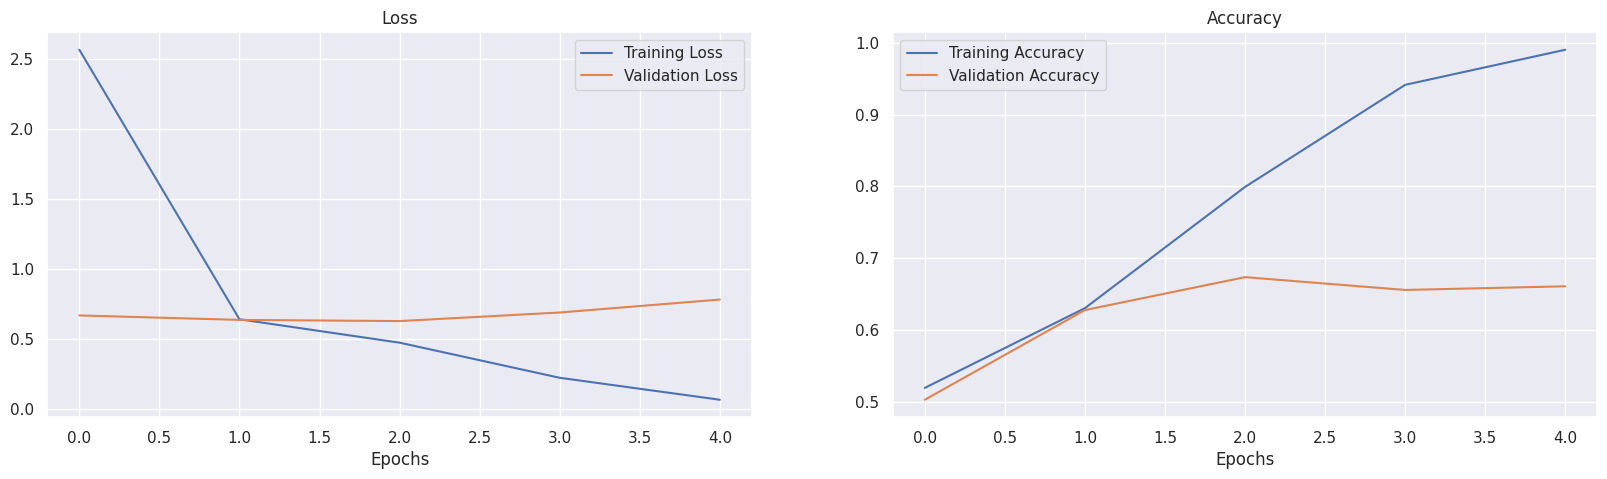

In [54]:
plot_loss_curves(history_1)

In [55]:
model_2 = Sequential([
    Input(shape = (224, 224, 3)),   
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), 
    MaxPool2D(pool_size = 2), 
    Conv2D(filters = 32, kernel_size =2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')  
])

model_2.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs= 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
50/50 [==============================] - 11s 197ms/step - loss: 0.6816 - accuracy: 0.5940 - val_loss: 0.5955 - val_accuracy: 0.7092
Epoch 2/5
50/50 [==============================] - 10s 201ms/step - loss: 0.5689 - accuracy: 0.7116 - val_loss: 0.5532 - val_accuracy: 0.7602
Epoch 3/5
50/50 [==============================] - 9s 175ms/step - loss: 0.4779 - accuracy: 0.7992 - val_loss: 0.6070 - val_accuracy: 0.7092
Epoch 4/5
50/50 [==============================] - 10s 203ms/step - loss: 0.4007 - accuracy: 0.8399 - val_loss: 0.5463 - val_accuracy: 0.7730
Epoch 5/5
50/50 [==============================] - 10s 203ms/step - loss: 0.3151 - accuracy: 0.8888 - val_loss: 0.5644 - val_accuracy: 0.7245


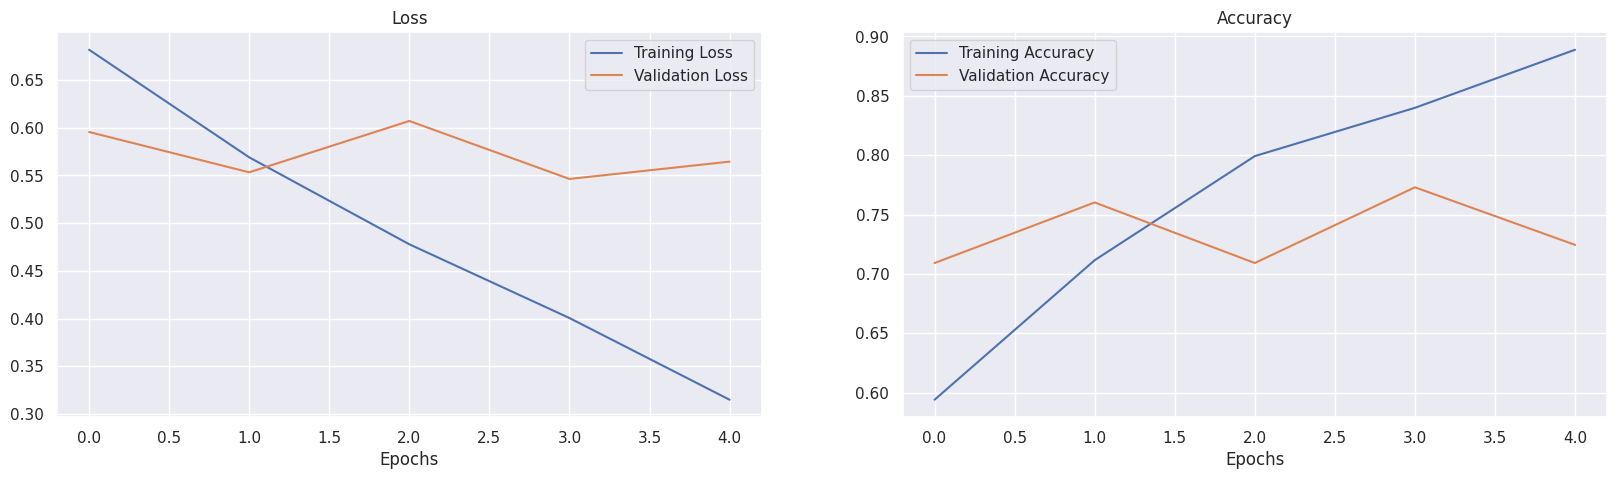

In [56]:
plot_loss_curves(history_2)

In [57]:
data_gen_augmented = ImageDataGenerator(rescale = 1/255., 
                                        validation_split = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip= True,
                                        rotation_range = 20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2)

print('Augmented training Images:')
train_data_augmented = data_gen_augmented.flow_from_directory(data_dir, 
                                                              target_size = (224, 224), 
                                                              batch_size = 32,
                                                              subset = 'training',
                                                              class_mode = 'binary')

print('Unchanged Validation Images:')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Augmented training Images:
Found 1574 images belonging to 2 classes.
Unchanged Validation Images:
Found 392 images belonging to 2 classes.


In [58]:
model_3 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_augmented,
                        epochs= 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
50/50 [==============================] - 26s 473ms/step - loss: 0.7536 - accuracy: 0.5712 - val_loss: 0.6084 - val_accuracy: 0.6964
Epoch 2/5
50/50 [==============================] - 25s 493ms/step - loss: 0.6243 - accuracy: 0.6582 - val_loss: 0.5700 - val_accuracy: 0.7168
Epoch 3/5
50/50 [==============================] - 25s 493ms/step - loss: 0.6159 - accuracy: 0.6665 - val_loss: 0.5847 - val_accuracy: 0.7219
Epoch 4/5
50/50 [==============================] - 25s 494ms/step - loss: 0.5981 - accuracy: 0.6823 - val_loss: 0.5427 - val_accuracy: 0.7372
Epoch 5/5
50/50 [==============================] - 25s 495ms/step - loss: 0.5708 - accuracy: 0.7103 - val_loss: 0.5344 - val_accuracy: 0.7449


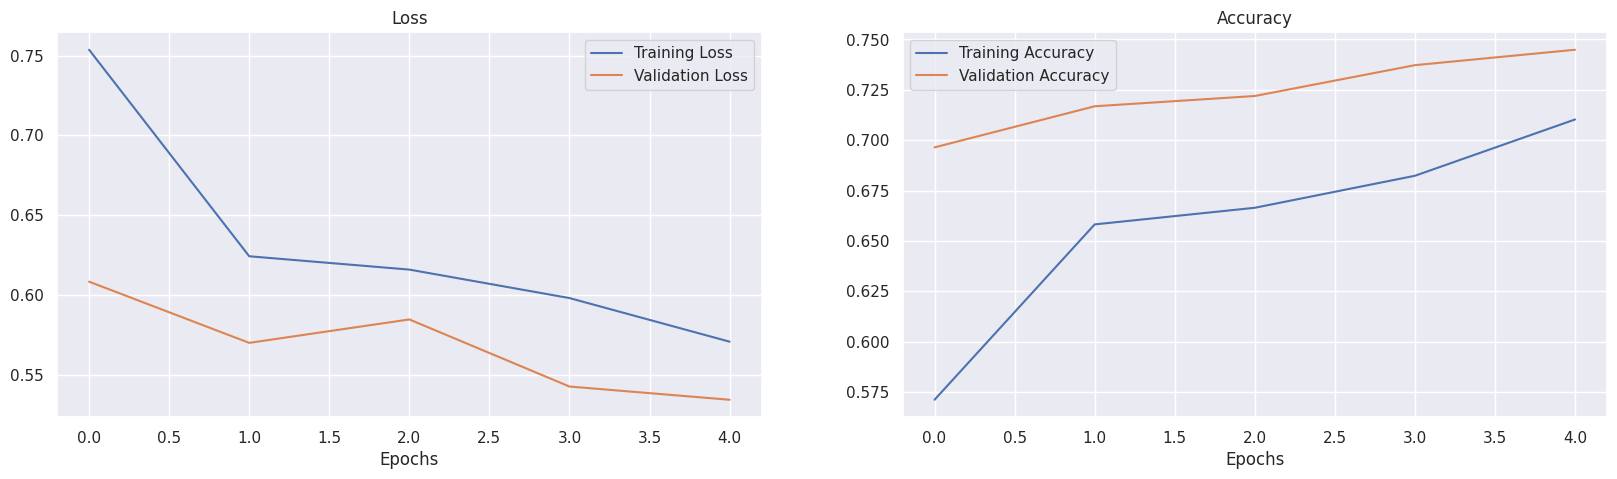

In [59]:
plot_loss_curves(history_3)

In [60]:
model_4 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 10, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 64, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_4.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data, 
                        epochs= 20,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/20
50/50 [==============================] - 11s 197ms/step - loss: 0.6747 - accuracy: 0.5610 - val_loss: 0.6549 - val_accuracy: 0.5842
Epoch 2/20
50/50 [==============================] - 10s 199ms/step - loss: 0.6426 - accuracy: 0.6277 - val_loss: 0.6104 - val_accuracy: 0.7092
Epoch 3/20
50/50 [==============================] - 10s 203ms/step - loss: 0.6092 - accuracy: 0.6830 - val_loss: 0.5905 - val_accuracy: 0.7398
Epoch 4/20
50/50 [==============================] - 9s 190ms/step - loss: 0.5886 - accuracy: 0.6982 - val_loss: 0.5797 - val_accuracy: 0.7321
Epoch 5/20
50/50 [==============================] - 9s 183ms/step - loss: 0.5654 - accuracy: 0.7268 - val_loss: 0.5634 - val_accuracy: 0.7245
Epoch 6/20
50/50 [==============================] - 10s 198ms/step - loss: 0.5560 - accuracy: 0.7224 - val_loss: 0.5538 - val_accuracy: 0.7168
Epoch 7/20
50/50 [==============================] - 10s 200ms/step - loss: 0.5286 - accuracy: 0.7522 - val_loss: 0.5348 - val_accuracy: 0.7474
E

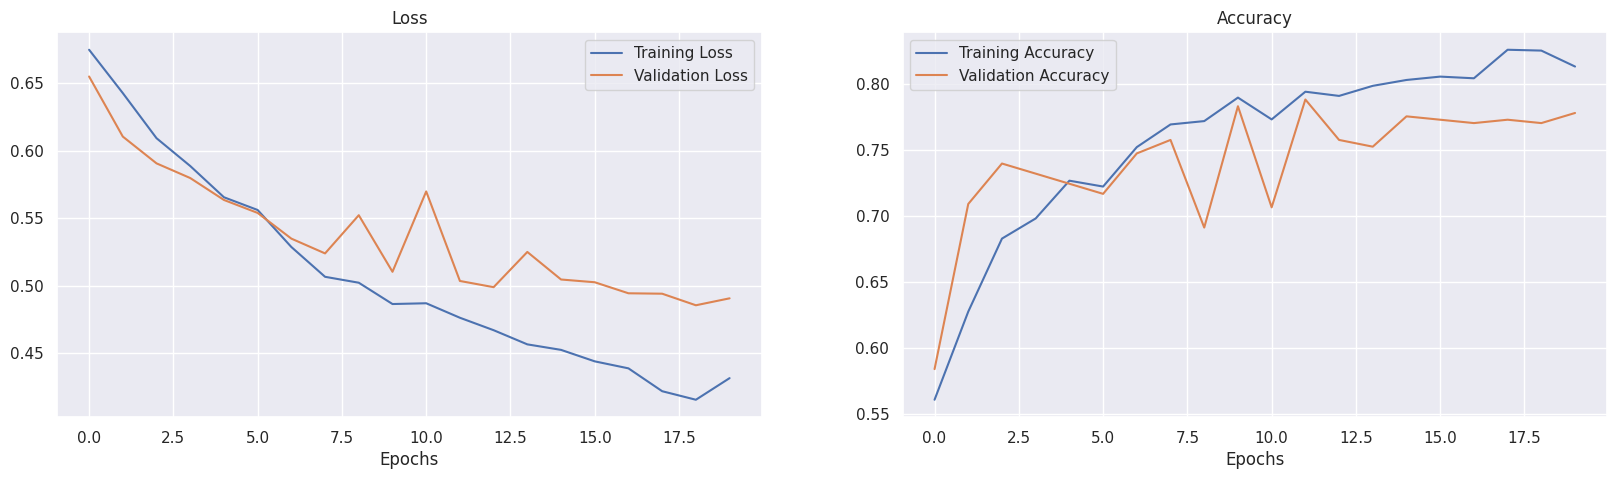

In [61]:
plot_loss_curves(history_4)

In [62]:
url = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

feature_extractor_layer = hub.KerasLayer(url,
                                         trainable=False,
                                         input_shape=(224, 224, 3))

model_5 = Sequential([
    feature_extractor_layer,
    Dense(1, activation = 'sigmoid')
])

model_5.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs= 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/10
50/50 [==============================] - 35s 480ms/step - loss: 0.2734 - accuracy: 0.9149 - val_loss: 0.1431 - val_accuracy: 0.9439
Epoch 2/10
50/50 [==============================] - 22s 444ms/step - loss: 0.1227 - accuracy: 0.9568 - val_loss: 0.1153 - val_accuracy: 0.9592
Epoch 3/10
50/50 [==============================] - 21s 426ms/step - loss: 0.1040 - accuracy: 0.9644 - val_loss: 0.1114 - val_accuracy: 0.9617
Epoch 4/10
50/50 [==============================] - 21s 423ms/step - loss: 0.0923 - accuracy: 0.9670 - val_loss: 0.0968 - val_accuracy: 0.9668
Epoch 5/10
50/50 [==============================] - 21s 423ms/step - loss: 0.0866 - accuracy: 0.9695 - val_loss: 0.0988 - val_accuracy: 0.9694
Epoch 6/10
50/50 [==============================] - 22s 429ms/step - loss: 0.0792 - accuracy: 0.9740 - val_loss: 0.0916 - val_accuracy: 0.9694
Epoch 7/10
50/50 [==============================] - 21s 427ms/step - loss: 0.0751 - accuracy: 0.9733 - val_loss: 0.0905 - val_accuracy: 0.9694

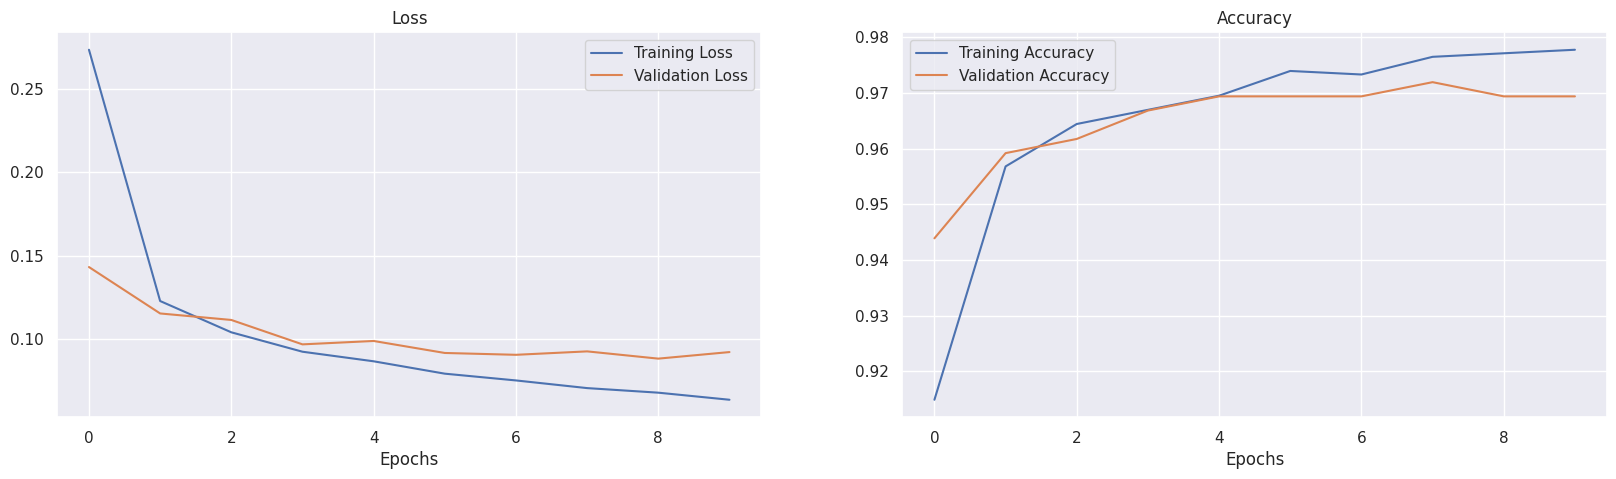

In [64]:
plot_loss_curves(history_5)